Ein magisches Quadrat ist ein Quadrat von nxn Zellen, die die Werte von 1 bis nxn enthalten. Dabei sind die Zeilen-, Spalten und Diagonalensummen alle gleich.

Die Variablen sind in der Form x(r,c,v) mit den Zeilen(r)- und Spalten(c)indizes 0-based.

Der Wert(v) ist ebenfalls 0-based und x(r,c,v)=1 heisst somit, dass in der Zeile r+1 und in der Spalte c+1 der Wert v+1 steht.

In [1]:
from dadk.FujitsuQUBOSolver import *
# from dadk.FujitsuQUBOSolverDAU import *
from dadk.FujitsuQUBOSolverEmulatorCPU import *
# from dadk.FujitsuQUBOSolverEmulatorCPUOneHot import *

from dadk.Solution_SolutionList import *
from dadk.BinPol import *

from tabulate import tabulate
import ipywidgets as widgets

def mapColumn(i):
    mapping = {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
        6: 2,
        7: 2,
        8: 2,
    }
    return mapping.get(i, 2)

print("\nready")


ready


In [2]:
Sudoku = [[8, 0, 0,  0, 0, 0,  0, 0, 0],
          [0, 0, 3,  6, 0, 0,  0, 0, 0],
          [0, 7, 0,  0, 9, 0,  2, 0, 0],
          
          [0, 5, 0,  0, 0, 7,  0, 0, 0],
          [0, 0, 0,  0, 4, 5,  7, 0, 0],
          [0, 0, 0,  1, 0, 0,  0, 3, 0],
          
          [0, 0, 1,  0, 0, 0,  0, 6, 8],
          [0, 0, 8,  5, 0, 0,  0, 1, 0],
          [0, 9, 0,  0, 0, 0,  4, 0, 0]]
N = len(Sudoku)

given_bits = np.full((N, N, 9), -1, np.int8)

for r in range(N):
    for c in range(len(Sudoku[r])):
        print('-' if (Sudoku[r][c]==0) else Sudoku[r][c], end='')
        if (c+1)%3==0:
            print(" ", end='')
        if Sudoku[r][c]!=0:
            for v in range(9): 
                given_bits[r][c][v]= 0 if (v!=Sudoku[r][c]-1) else 1
    if(r+1)%3==0:
        print('')
    print("");


8-- --- --- 
--3 6-- --- 
-7- -9- 2-- 

-5- --7 --- 
--- -45 7-- 
--- 1-- -3- 

--1 --- -68 
--8 5-- -1- 
-9- --- 4-- 



In [3]:

    
var_shape_set = VarShapeSet(BitArrayShape('x', (N, N, 9), one_hot=OneHot.one_way, constant_bits=given_bits, axis_names=['Row', 'Column', 'Value'])) 

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8)]
[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8)]
[(0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 2, 8)]
[(0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 3, 8)]
[(0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 4, 8)]
[(0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (0, 5, 6), (0, 5, 7), (0, 5, 8)]
[(0, 6, 0), (0, 6, 1), (0, 6, 2), (0, 6, 3), (0, 6, 4), (0, 6, 5), (0, 6, 6), (0, 6, 7), (0, 6, 8)]
[(0, 7, 0), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 7, 4), (0, 7, 5), (0, 7, 6), (0, 7, 7), (0, 7, 8)]
[(0, 8, 0), (0, 8, 1), (0, 8, 2), (0, 8, 3), (0, 8, 4), (0, 8, 5), (0, 8, 6), (0, 8, 7), (0, 8, 8)]
[(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 0, 8)]


## QUBO parts

### H1 : Nur eine Zahl pro Zelle
        

In [4]:
H1 = BinPol(var_shape_set)
for r in range(N):
    for c in range(N):
        h = BinPol(var_shape_set).add_term(-1, ())
        for v in range(9):
            h.add_term(1,(('x', r, c, v),))
        h.power(2)
        H1.add(h)
       
# H1x = var_shape_set.generate_penalty_polynomial('x')
# print(H1 == H1x)

### H2 : In each square, one digit occurs exactly a single time

In [5]:
H2 = BinPol(var_shape_set)
for i in range(9): #9 squares
    for v in range(9):
        h = BinPol(var_shape_set).add_term(-1, ())
        for r in range(3):
            for c in range(3):
                h.add_term(1,(('x', r + (i%3)*3, c + mapColumn(i)*3, v),))
        h.power(2)
        H2.add(h)

### H3 : Given numbers

In [6]:
"""Sudoku = [[8, 0, 0,  0, 0, 0,  0, 0, 0],
          [0, 0, 3,  6, 0, 0,  0, 0, 0],
          [0, 7, 0,  0, 9, 0,  2, 0, 0],
          
          [0, 5, 0,  0, 0, 7,  0, 0, 0],
          [0, 0, 0,  0, 4, 5,  7, 0, 0],
          [0, 0, 0,  1, 0, 0,  0, 3, 0],
          
          [0, 0, 1,  0, 0, 0,  0, 6, 8],
          [0, 0, 8,  5, 0, 0,  0, 1, 0],
          [0, 9, 0,  0, 0, 0,  4, 0, 0]]

H3 = BinPol(var_shape_set)
for i in range(len(Sudoku)):
    for c in range(len(Sudoku[i])):
        print('-' if (Sudoku[i][c]==0) else Sudoku[i][c], end='')
        if (c+1)%3==0:
            print(" ", end='')
        if Sudoku[i][c]!=0:
            h = BinPol(var_shape_set).add_term(-1, ())
            h.add_term(1,(('x', i, c, Sudoku[i][c]-1),))
            h.power(2)
            H3.add(h)
    if(i+1)%3==0:
        print('')
    print("");
    """


'Sudoku = [[8, 0, 0,  0, 0, 0,  0, 0, 0],\n          [0, 0, 3,  6, 0, 0,  0, 0, 0],\n          [0, 7, 0,  0, 9, 0,  2, 0, 0],\n          \n          [0, 5, 0,  0, 0, 7,  0, 0, 0],\n          [0, 0, 0,  0, 4, 5,  7, 0, 0],\n          [0, 0, 0,  1, 0, 0,  0, 3, 0],\n          \n          [0, 0, 1,  0, 0, 0,  0, 6, 8],\n          [0, 0, 8,  5, 0, 0,  0, 1, 0],\n          [0, 9, 0,  0, 0, 0,  4, 0, 0]]\n\nH3 = BinPol(var_shape_set)\nfor i in range(len(Sudoku)):\n    for c in range(len(Sudoku[i])):\n        print(\'-\' if (Sudoku[i][c]==0) else Sudoku[i][c], end=\'\')\n        if (c+1)%3==0:\n            print(" ", end=\'\')\n        if Sudoku[i][c]!=0:\n            h = BinPol(var_shape_set).add_term(-1, ())\n            h.add_term(1,((\'x\', i, c, Sudoku[i][c]-1),))\n            h.power(2)\n            H3.add(h)\n    if(i+1)%3==0:\n        print(\'\')\n    print("");\n    '

### H4: In a column and row, one digit occurs exactly a single time


In [7]:
H4 = BinPol(var_shape_set)
for c in range(N):
    for v in range(9):
        h = BinPol(var_shape_set).add_term(-1, ())
        for r in range(N):
            h.add_term(1,(('x', r, c, v),))
        h.power(2)
        H4.add(h)
            

In [8]:
for r in range(N):
    for v in range(9):
        h = BinPol(var_shape_set).add_term(-1, ())
        for c in range(N):
            h.add_term(1,(('x', r, c, v),))
        h.power(2)
        H4.add(h)

## Solve

In [9]:
solverCPU = FujitsuQUBOSolverEmulatorCPU( # FujitsuQUBOSolverEmulatorOneHotCPU or FujitsuQUBOSolverEmulatorCPU
            number_iterations=300*1000,
            number_runs=1,

            expert_mode=True,
            temperature_start=10000,
            temperature_end=1,
            temperature_mode=0,
            offset_increase_rate=20,

            solution_mode='COMPLETE',
            optimization_method=OM_ANNEALING,
    
            graphics=GraphicsDetail.ALL,

            annealer_version=2,
            bit_precision=16)

""" solverDAU = FujitsuQUBOSolverDAU(
            number_iterations=10*1000*1000,
            number_runs=128,

            expert_mode=True,
            temperature_start=10000,
            temperature_end=1,
            temperature_mode=0,
            offset_increase_rate=20,

            solution_mode='COMPLETE',
            optimization_method=OM_ANNEALING,

            use_access_profile=True,
            annealer_version=2,
            bit_precision=16) """
    
solver = solverCPU

In [10]:
qubo = 1000*(H1 + H2 + H4)
solution_list = solver.minimize(qubo) 

In [11]:
for solution in solution_list.get_solution_list():   
    if qubo.compute(solution.configuration) == 0:
    
        magic_square = np.full((N,N), -1) 
    
        config_bits = VarSet(solution.configuration, var_shape_set)
        start_table = config_bits.extract_bit_array('x')
        for r in range(N):
            for c in range(N):
                for v in range(9):
                    if start_table.data[r, c, v]:
                        magic_square[r][c] = (v+1)

        display(widgets.HTML('<h4>frequency %d</h4>' % solution.frequency))
        print(tabulate(magic_square, tablefmt="fancy_grid"))
    else:
        print('not a valid solution')

not a valid solution


Input parameters
  Total number of iterations per run________: 300000
  number_runs_______________________________: 1
  Number of replicas________________________: 26
  Temperature mode__________________________: 0
  Temperature mode text_____________________: EXPONENTIAL
  Start temperature_________________________: 10000.0
  Final temperature (mode 3)________________: 1.0
  Temperature decay (mode 0)________________: 0.0030664260520213427
  Temperature interval (mode 0)_____________: 100
  Dynamic energy offset_____________________: 20.0
  Solution mode_____________________________: COMPLETE
  Optimization method_______________________: annealing
  Annealer version__________________________: 2
  Bit precision_____________________________: 16
  Processor_________________________________: CPU
  graphics.value____________________________: 2
  graphics.name_____________________________: ALL
  Noise model_______________________________: METROPOLIS
Runtime
  Execution technology___________

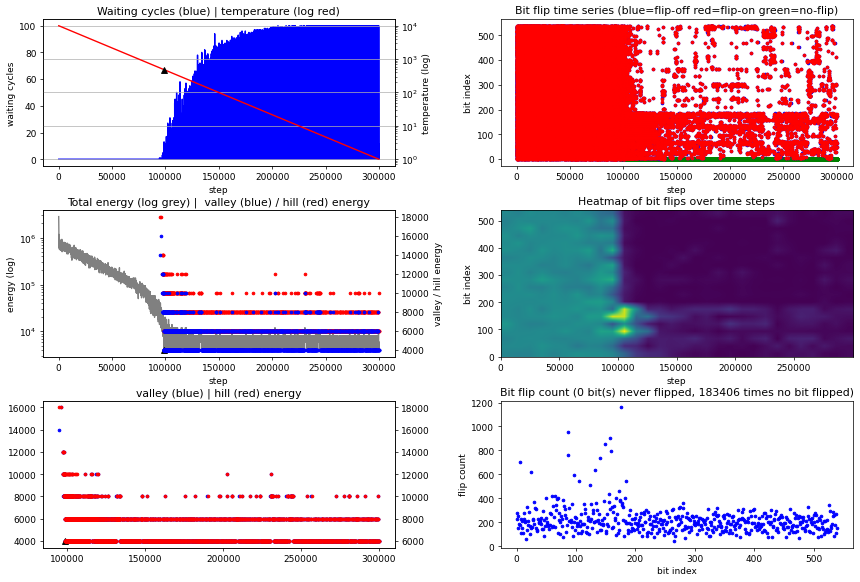

In [12]:
solution_list.print_stats()
solution_list.print_graphs()